## Problem Statement

### Context
Patients with Liver disease have been continuously increasing because of excessive consumption of alcohol, inhale of harmful gases, intake of contaminated food, pickles and drugs. This dataset was used to evaluate prediction algorithms in an effort to reduce burden on doctors.

### Content
This data set contains 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India. The "Dataset" column is a class label used to divide groups into liver patient (liver disease) or not (no disease). This data set contains 441 male patient records and 142 female patient records.

Any patient whose age exceeded 89 is listed as being of age "90".

Columns:

 - Age of the patient
 - Gender of the patient
 - Total Bilirubin
 - Direct Bilirubin
 - Alkaline Phosphotase
 - Alamine Aminotransferase
 - Aspartate Aminotransferase
 - Total Protiens
 - Albumin
 - Albumin and Globulin Ratio
 - Dataset: field used to split the data into two sets (patient with liver disease, or no disease)

### Acknowledgements
This dataset was downloaded from the UCI ML Repository: [http://archive.ics.uci.edu/ml]


### Objective

We will use this dataset to predict which patients are suffering from liver disease and which are not

### Machine Learning Models
#### Type of machine learning model:

This is binary classification problem, where given the above set of features, we need to predict if a given patient has liver disease or not

#### Evaluation metric:

Since this is binary classification problem, we use the following metrics:

 - Confusion matrix - For getting a better clarity of the no of correct/incorrect predictions by the model
 - ROC-AUC - It considers the rank of the output probabilities and intuitively measures the likelihood that model can distinguish between a positive point and a negative point. (Note: ROC-AUC is typically used for binary classification only). We will use AUC to select the best model.

#### Importing the useful libraries with their description

In [1]:
# for numerical computing
import numpy as np

# for dataframes
import pandas as pd

# for easier visualization
import seaborn as sns

# for visualization and to display plots
from matplotlib import pyplot as plt
%matplotlib inline

# import color maps
from matplotlib.colors import ListedColormap

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

# for mathematical operations
from math import sqrt

# to split train and test set
from sklearn.model_selection import train_test_split

# to perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# to perform cross-validation
from sklearn.model_selection import cross_val_score

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, classification_report

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score

#import xgboost
import os
import xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance  # to plot feature importance

# to save the final model on disk
from sklearn.externals import joblib

In [2]:
df=pd.read_csv('indian_liver_patient.csv')

In [3]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
df.shape

(583, 11)

In [5]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [6]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


### Handling missing values

In [7]:
df.Albumin_and_Globulin_Ratio.fillna(df.Albumin_and_Globulin_Ratio.mean(), inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


### Exploratory Data Analysis

Filtering categorical data

In [9]:
df.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

In [10]:
df.dtypes[df.dtypes == 'object']

Gender    object
dtype: object

### Distribution of numerical features

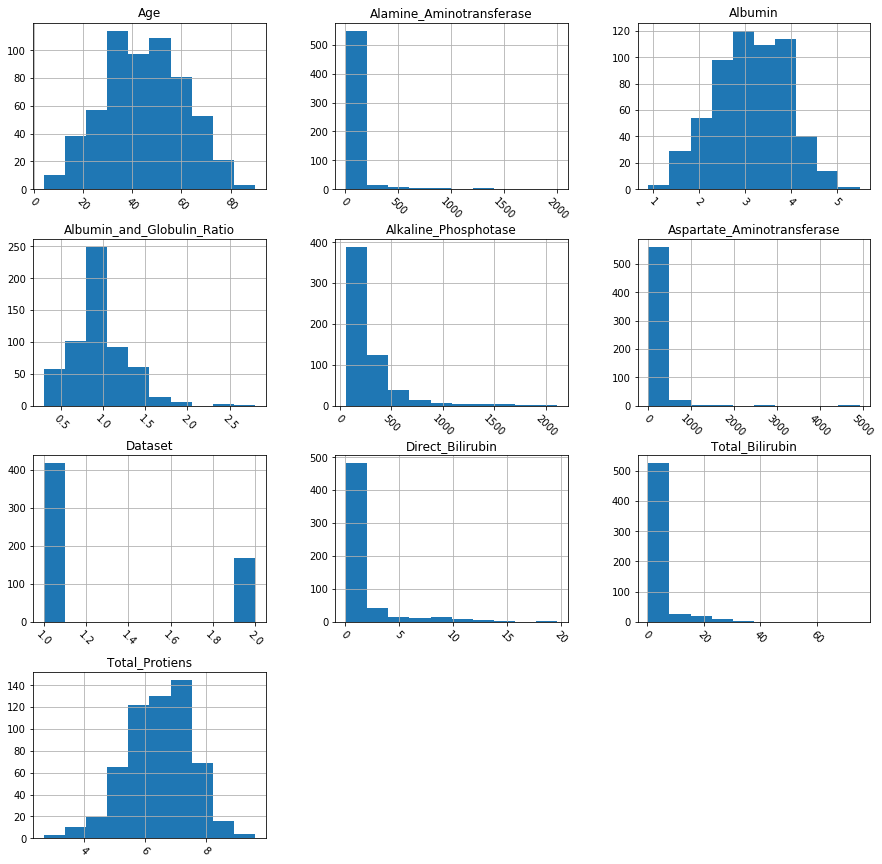

In [11]:
# Plot histogram 
df.hist(figsize = (15,15), xrot = -45, bins = 10)
plt.show;

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,583.0,44.746141,16.189833,4.0,33.0,45.000000,58.0,90.0
Total_Bilirubin,583.0,3.298799,6.209522,0.4,0.8,1.000000,2.6,75.0
Direct_Bilirubin,583.0,1.486106,2.808498,0.1,0.2,0.300000,1.3,19.7
Alkaline_Phosphotase,583.0,290.576329,242.937989,63.0,175.5,208.000000,298.0,2110.0
Alamine_Aminotransferase,583.0,80.713551,182.620356,10.0,23.0,35.000000,60.5,2000.0
Aspartate_Aminotransferase,583.0,109.910806,288.918529,10.0,25.0,42.000000,87.0,4929.0
Total_Protiens,583.0,6.483190,1.085451,2.7,5.8,6.600000,7.2,9.6
Albumin,583.0,3.141852,0.795519,0.9,2.6,3.100000,3.8,5.5
Albumin_and_Globulin_Ratio,583.0,0.947064,0.318492,0.3,0.7,0.947064,1.1,2.8
Dataset,583.0,1.286449,0.452490,1.0,1.0,1.000000,2.0,2.0


#### Inferences:
- The maximum value is too high compared to mean value for features Alamine_Aminotransferase and Aspartate_Aminotransferase
- So there are outliers present in these features


Dataset i.e output value has '1' for liver disease and '2' for no liver disease so let's make it 0 for no disease to make it convinient

In [13]:
def partition(x):
    if x == 2:
        return 0
    else:
        return 1

df['Dataset'] = df['Dataset'].map(partition)

### Distribution of categorical data

In [14]:
df.describe(include = ['object'])

,Gender
count,583
unique,2
top,Male
freq,441


### Bar plots for categorical data

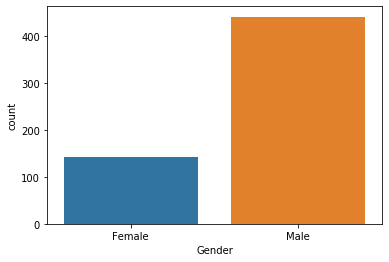

In [15]:
sns.countplot(x = 'Gender', data = df);

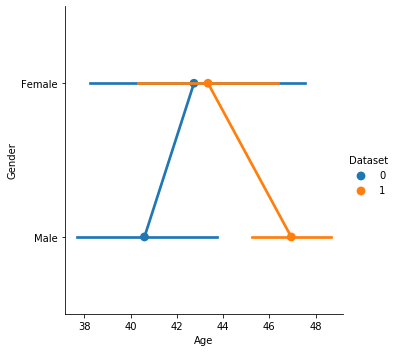

In [16]:
sns.factorplot (x="Age", y="Gender", hue="Dataset", data=df);

#### Inferences:
Age seems to be a factor for liver disease for both male and female genders

Number of patients that are male:  441
Number of patients that are female:  142


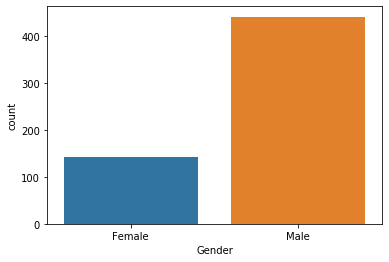

In [17]:
sns.countplot(data=df, x = 'Gender', label='Count')

M, F = df['Gender'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

#### Inferences:
There are more male patients than female patients

In [ ]:
df['Gender'].replace({'Male':0,'Female':1}, inplace = True)

### 2-D scatter plot
- To visualize how features vary with each other

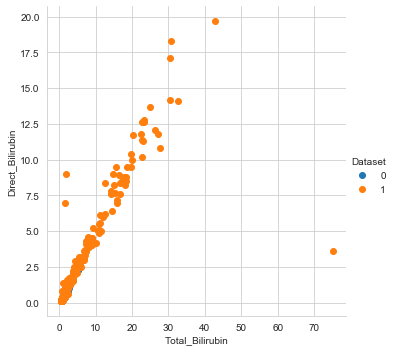

In [18]:
sns.set_style('whitegrid')   ## Background Grid
sns.FacetGrid(df, hue = 'Dataset', size = 5).map(plt.scatter, 
                                                'Total_Bilirubin', 'Direct_Bilirubin').add_legend()

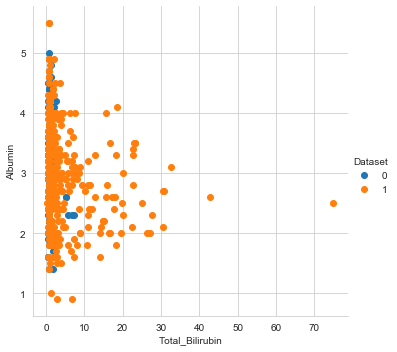

In [19]:
sns.set_style('whitegrid')   ## Background Grid
sns.FacetGrid(df, hue = 'Dataset', size = 5).map(plt.scatter, 'Total_Bilirubin', 'Albumin').add_legend()

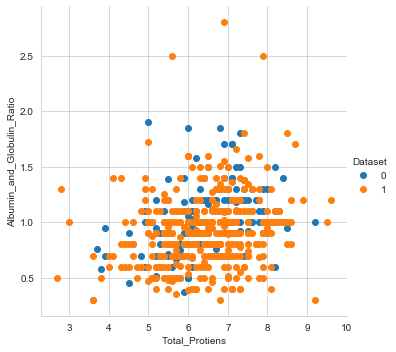

In [20]:
sns.set_style('whitegrid')   ## Background Grid
sns.FacetGrid(df, hue = 'Dataset', size = 5).map(plt.scatter, 'Total_Protiens', 'Albumin_and_Globulin_Ratio').add_legend()

### Correlations

- Correlations near -1 or 1 indicate a strong relationship.
- Those closer to 0 indicate a weak relationship.
- 0 indicates no relationship.

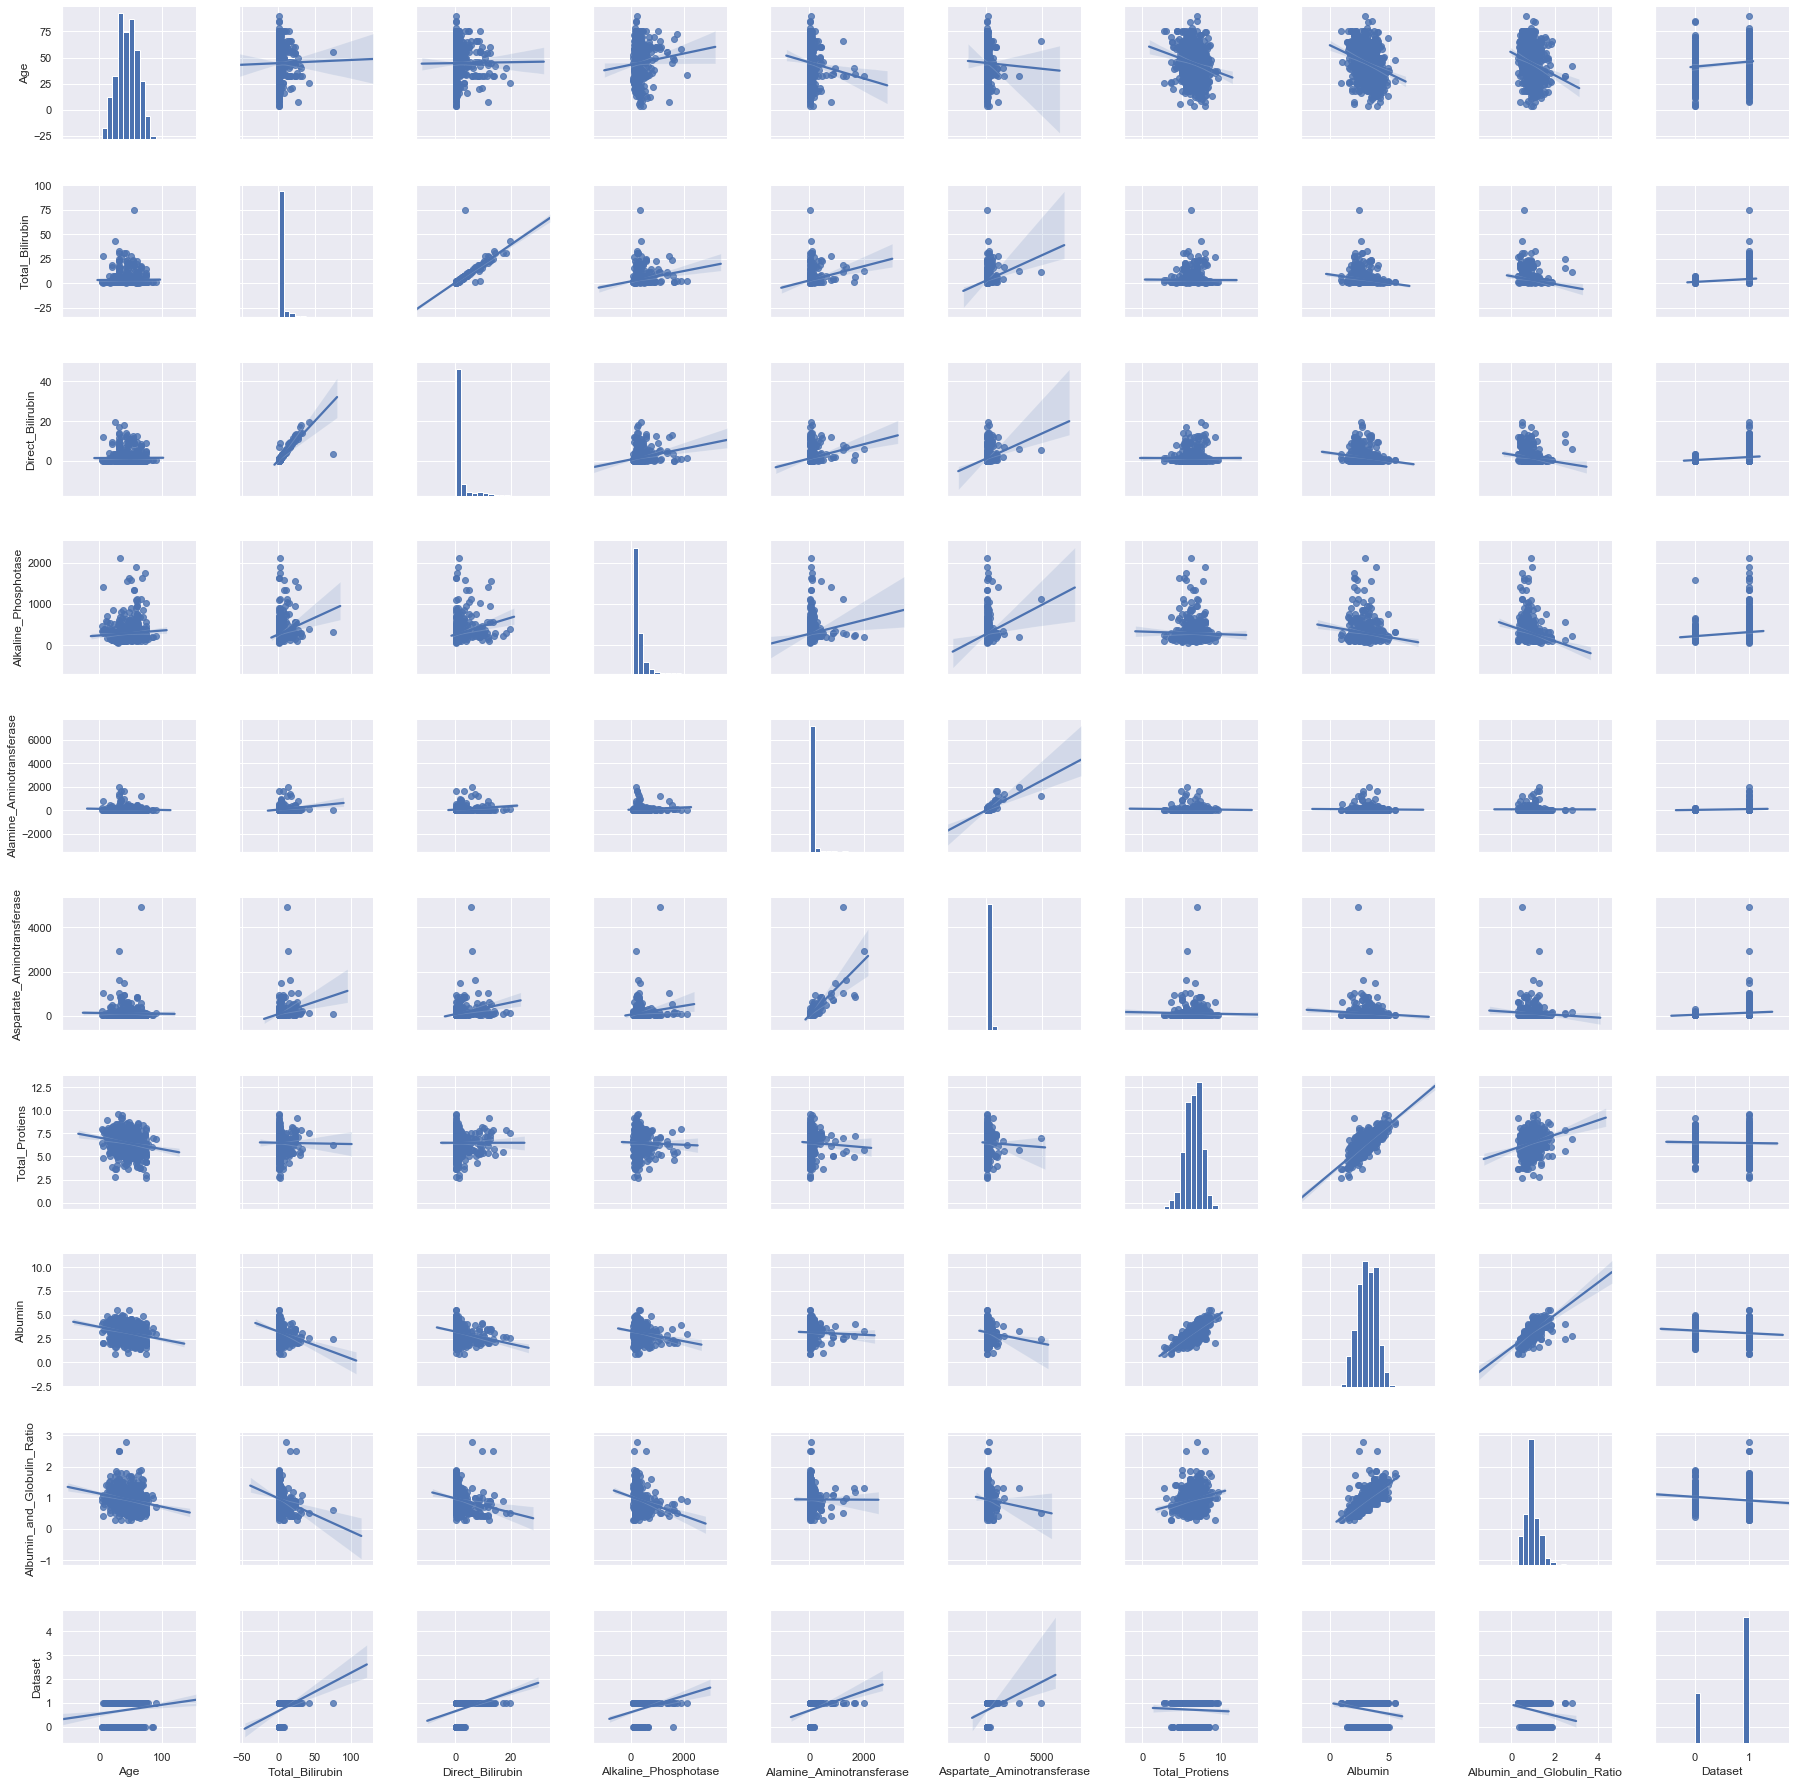

In [21]:
# correlation between variables
sns.set()
sns.pairplot(df, kind='reg')

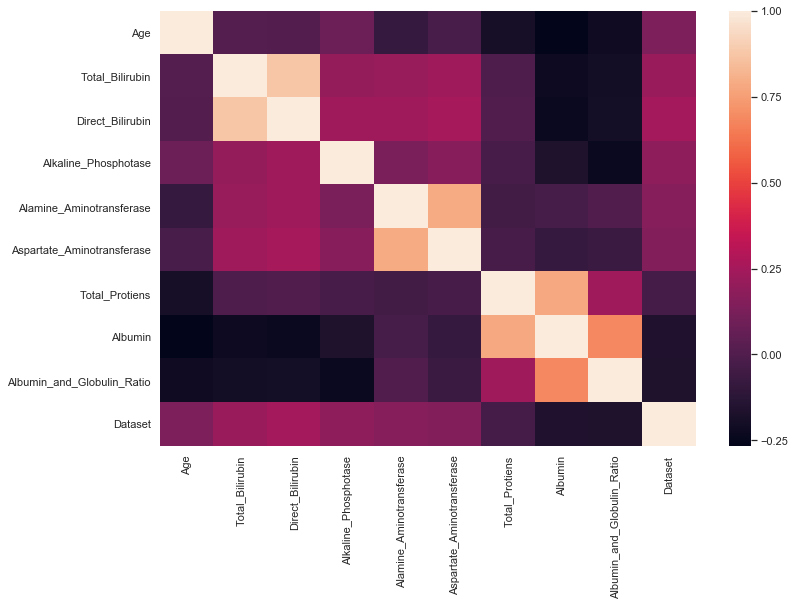

In [22]:
plt.figure(figsize=(12,8))
cor = df.corr()
sns.heatmap(cor);

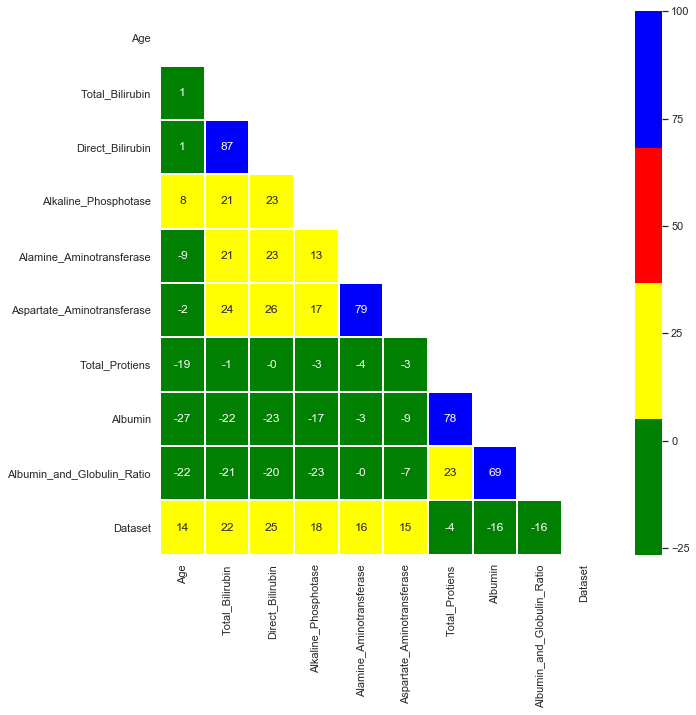

In [23]:
mask=np.zeros_like(cor)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
with sns.axes_style("white"):
    ax = sns.heatmap(cor*100, mask=mask, fmt='.0f', annot=True, lw=1, cmap=ListedColormap(['green', 'yellow', 'red','blue']))

In [24]:
# correlation with Dataset - target value
df.corr()['Dataset']*100

Age                            13.735063
Total_Bilirubin                22.020756
Direct_Bilirubin               24.604634
Alkaline_Phosphotase           18.486561
Alamine_Aminotransferase       16.341616
Aspartate_Aminotransferase     15.193375
Total_Protiens                 -3.500824
Albumin                       -16.138782
Albumin_and_Globulin_Ratio    -16.231913
Dataset                       100.000000
Name: Dataset, dtype: float64

#### Inference:
Strong correlation between some variables:
- __direct_bilirubin__ & total_bilirubin
- __aspartate_aminotransferase__ & alamine_aminotransferase
- __total_protiens__ & albumin
- __albumin__ & albumin_and_globulin_ratio

#### We need to drop the one of the features with high correlations

In [25]:
cols_to_drop = ['Direct_Bilirubin', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin']
cols_to_use = ['Age', 'Gender', 'Total_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase',
                                     'Albumin_and_Globulin_Ratio', 'Dataset']

In [26]:
df.drop(['Direct_Bilirubin', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin'], axis=1, inplace=True)

In [27]:
df.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,187,16,0.90,1
1,62,Male,10.9,699,64,0.74,1
2,62,Male,7.3,490,60,0.89,1
3,58,Male,1.0,182,14,1.00,1
4,72,Male,3.9,195,27,0.40,1


## Data Cleaning

In [28]:
df = df.drop_duplicates()  # 13 duplicates
print( df.shape )

(570, 7)


### Outliers and Transformation
Check data using boxplot and distplot to see what features are skewed, what is ratio of outliers

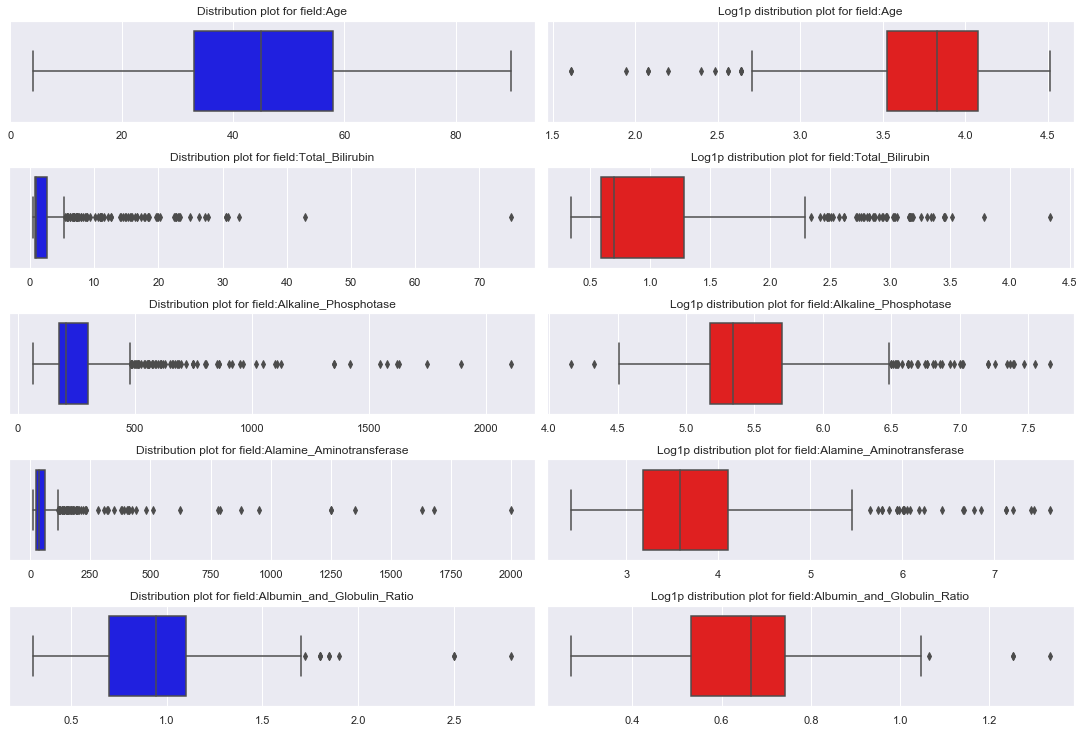

In [29]:
#check for outliers using boxplot

plt.figure(figsize=(15, 20))

for i, c in enumerate(df.drop(['Dataset','Gender'], axis=1).select_dtypes(include='number').columns):
    plt.subplot(10,2,i*2+1)
    sns.boxplot(df[c], color='blue')
    plt.title('Distribution plot for field:' + c)
    plt.xlabel('')
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

    
    plt.subplot(10,2,i*2+2)
    sns.boxplot(df[c].apply('log1p'), color='red')
    plt.title('Log1p distribution plot for field:' + c)
    plt.xlabel('')
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

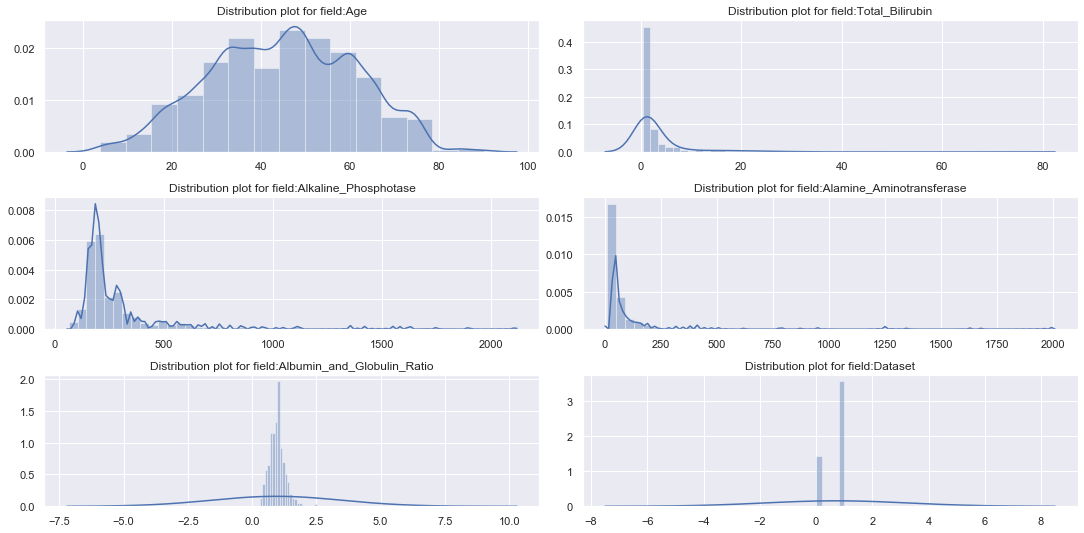

In [30]:
plt.figure(figsize=(15, 12))

for i, c in enumerate(df.drop('Gender',axis = 1).select_dtypes(include='number').columns):
    plt.subplot(5,2,i+1)
    sns.distplot(df[c],kde_kws={'bw': 2.5})
    plt.title('Distribution plot for field:' + c)
    plt.xlabel('')
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

### Inferences:

- dataset is slightly imbalanced
- slightly skewed features: albumin_and_globulin_ration
- strongly skewed features: total_bilirubin, alkaline_phosphotase, alamine_aminotransferase

### Action:
- Fixing by using  log1p transformation and,
- then scale variables using RobustScaler or standard scaler. RobustScaler is good for data with outliers.

In [31]:
# save skewed features
skewed_cols = ['Albumin_and_Globulin_Ratio','Total_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase']

In [32]:
# Apply log1p transformation on selected dataset columns
for c in skewed_cols:
    df[c] = df[c].apply('log1p')

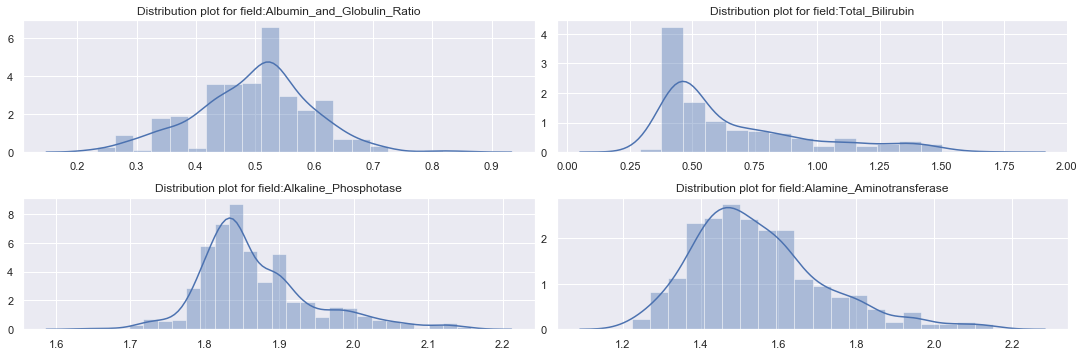

In [33]:
# Check the skewness again
plt.figure(figsize=(15, 12))

for i, c in enumerate(skewed_cols):
    plt.subplot(5,2,i+1)
    sns.distplot(df[c].apply(np.log1p))
    plt.title('Distribution plot for field:' + c)
    plt.xlabel('')
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

In [37]:
from sklearn.preprocessing import LabelEncoder,RobustScaler

In [40]:
# gender contains string values Male, Female; these will be converted into 0, 1
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df.Gender.head()

0    0
1    1
2    1
3    1
4    1
Name: Gender, dtype: int64

In [41]:
rs = RobustScaler()
for c in df[['Age', 'Gender', 'Total_Bilirubin', 'Alkaline_Phosphotase',
             'Alamine_Aminotransferase', 'Albumin_and_Globulin_Ratio']].columns:
    df[c] = rs.fit_transform(df[c].values.reshape(-1, 1))
df.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Albumin_and_Globulin_Ratio,Dataset
0,0.80,-1.0,-0.234465,-0.201971,-0.804341,-0.115796,1
1,0.68,0.0,2.572890,2.305475,0.633422,-0.532099,1
2,0.68,0.0,2.053111,1.629067,0.565334,-0.140769,1
3,0.52,0.0,0.000000,-0.253385,-0.938518,0.126945,1
4,1.08,0.0,1.292782,-0.122488,-0.269414,-1.560985,1


### Balanced data

- The dataset is imbalanced, so use sklearn's sample to have same ratio of target variables (can also use SMOTE from imblearn). 
- Not required always as  algorithms already have techniques for imbalanced datasets

In [42]:
from sklearn.utils import resample
df['Dataset'].value_counts()

1    406
0    164
Name: Dataset, dtype: int64

In [43]:
# Split data on majority and minority.minority is dataset == 0
minority = df[df.Dataset==0]
majority = df[df.Dataset==1]

print('Minority size:', minority.shape)
print('Majority size:', majority.shape)

Minority size: (164, 7)
Majority size: (406, 7)


In [44]:
# choosing upsample as even now we do not have too much data
minority_upsample = resample(minority, replace=True, n_samples=majority.shape[0])
print('Minority upsampled size:', minority_upsample.shape)

Minority upsampled size: (406, 7)


In [45]:
# merge majority with upsampled minority
df = pd.concat([minority_upsample, majority], axis=0)

In [46]:
df.shape

(812, 7)

In [47]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [48]:
df.head()  # Shuffled and sample data

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Albumin_and_Globulin_Ratio,Dataset
15,-0.80,0.0,-0.321928,-0.242991,1.005842,-0.642160,0
379,1.08,0.0,-0.234465,-0.222371,-0.804341,0.126945,0
333,-0.36,-1.0,-0.234465,-0.594888,-0.527944,0.357840,0
265,-1.64,0.0,-0.074001,0.977959,-0.160301,0.126945,0
344,-0.32,0.0,-0.152003,-0.122488,0.565334,1.182950,0


### Splitting the dataset

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Dataset', axis=1), df['Dataset'], test_size=0.25, random_state=123)

print('Train values shape:', X_train.shape)
print('Test values shape:', X_test.shape)
print('Train target shape:', y_train.shape)
print('Test target shape:', y_test.shape)

Train values shape: (609, 6)
Test values shape: (203, 6)
Train target shape: (609,)
Test target shape: (203,)


## Model Selection

- Will use several popular models and see how they perform on our dataset.
- Finally choose 3 best performing models and will merge them together.

### Model-1 : Logistic Regression

In [50]:
# Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)

print(model)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_hat))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_test_hat))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))


LogisticRegression()
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.65      0.80      0.72       294
           1       0.76      0.60      0.67       315

    accuracy                           0.70       609
   macro avg       0.71      0.70      0.69       609
weighted avg       0.71      0.70      0.69       609

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.72      0.81      0.76       112
           1       0.72      0.60      0.66        91

    accuracy                           0.72       203
   macro avg       0.72      0.71      0.71       203
weighted avg       0.72      0.72      0.72       203

Roc_auc score
-------------------------------------------------------
0.7084478021978022

Confusion matrix
-------------------------------------------------------
[[91 21]
 [36 5

#### Inference:
Logistic Regression results were good with  0.72 f1 score on test dataset and no overfitting

### Model-2 : Support Vector Classifier

In [51]:
# Support Vector Machines
model = SVC()
model.fit(X_train, y_train)
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)

print(model)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_hat))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_test_hat))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))


SVC()
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.66      0.89      0.76       294
           1       0.85      0.57      0.68       315

    accuracy                           0.72       609
   macro avg       0.75      0.73      0.72       609
weighted avg       0.76      0.72      0.72       609

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.70      0.90      0.79       112
           1       0.81      0.53      0.64        91

    accuracy                           0.73       203
   macro avg       0.76      0.71      0.71       203
weighted avg       0.75      0.73      0.72       203

Roc_auc score
-------------------------------------------------------
0.7146291208791209

Confusion matrix
-------------------------------------------------------
[[101  11]
 [ 43  48]]


#### Inference: f1 score and roc_auc score increased slightly and classification is working fine

### Model-3 : Random Forest Classifier

In [52]:
# Random Forest
model = RandomForestClassifier(n_jobs=-1,random_state=123)
model.fit(X_train, y_train)
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)

print(model)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_hat))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_test_hat))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))

RandomForestClassifier(n_jobs=-1, random_state=123)
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       294
           1       1.00      1.00      1.00       315

    accuracy                           1.00       609
   macro avg       1.00      1.00      1.00       609
weighted avg       1.00      1.00      1.00       609

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       112
           1       0.86      0.80      0.83        91

    accuracy                           0.85       203
   macro avg       0.85      0.85      0.85       203
weighted avg       0.85      0.85      0.85       203

Roc_auc score
-------------------------------------------------------
0.8475274725274726

Confusion matrix
----------------------------------------

In [53]:
indices = np.argsort(-model.feature_importances_)
print("The features in order of importance are:")
print(50*'-')
for feature in df.drop('Dataset', axis=1).columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
Alkaline_Phosphotase
Total_Bilirubin
Alamine_Aminotransferase
Age
Albumin_and_Globulin_Ratio
Gender


### Inference: 
- 0.87 f1 score on test dataset, roc_auc reaching 0.85
- maybe model is overfitting but still generalises on test data
- Alamine_Phosphatese is having highest influence in this model

### Model-4 : Neural Nets

In [54]:
# Neural nets
model = MLPClassifier()
model.fit(X_train, y_train)
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)

print(model)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_hat))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_test_hat))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))


MLPClassifier()
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.68      0.85      0.75       294
           1       0.82      0.62      0.71       315

    accuracy                           0.73       609
   macro avg       0.75      0.74      0.73       609
weighted avg       0.75      0.73      0.73       609

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.74      0.85      0.79       112
           1       0.77      0.63      0.69        91

    accuracy                           0.75       203
   macro avg       0.75      0.74      0.74       203
weighted avg       0.75      0.75      0.74       203

Roc_auc score
-------------------------------------------------------
0.7372939560439561

Confusion matrix
-------------------------------------------------------
[[95 17]
 [34 57]]


### Inference: 
- Not performing well

## Model-5: XGBoost Classifier

In [55]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=123)
model.fit(X_train, y_train)
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)

print(model)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_hat))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_test_hat))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       294
           1       1.00      1.00      1.00       315

    accuracy                           1.00       609
   macro avg       1.00      1.00      1.00       609
weighted avg       1.00      1.00      1.00       609

Test performanc

#### Feature importance

In [56]:
def my_plot_importance(booster, figsize, **kwargs): 
    from xgboost import plot_importance
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax, **kwargs)

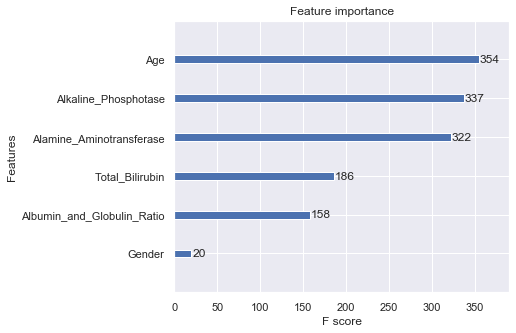

In [57]:
my_plot_importance(model, (6,5));

#### Inference: 
- This model is performing almost similar to random forest model
- Age is the most important feature for this model

### Model-6 : Extra Trees classifier

In [58]:
# Extra Trees
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier(random_state=123)
model.fit(X_train, y_train)
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)

print(model)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_hat))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_test_hat))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))


ExtraTreesClassifier(random_state=123)
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       294
           1       1.00      1.00      1.00       315

    accuracy                           1.00       609
   macro avg       1.00      1.00      1.00       609
weighted avg       1.00      1.00      1.00       609

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       112
           1       0.88      0.87      0.87        91

    accuracy                           0.89       203
   macro avg       0.89      0.88      0.89       203
weighted avg       0.89      0.89      0.89       203

Roc_auc score
-------------------------------------------------------
0.8849587912087912

Confusion matrix
-----------------------------------------------------

#### Feature Importance

In [59]:
indices = np.argsort(-model.feature_importances_)
print("The features in order of importance are:")
print(50*'-')
for feature in df.drop('Dataset', axis = 1).columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
Total_Bilirubin
Alkaline_Phosphotase
Alamine_Aminotransferase
Age
Albumin_and_Globulin_Ratio
Gender


#### Infernce : 
- Extra Tree classifier is performing best with highest roc_auc score of 0.92
- Total_Bilirubin is best feature for this model

### Model-7 : K-Neighbours

In [60]:
# K-Neighbors
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)
print(model)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_hat))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_test_hat))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))


KNeighborsClassifier()
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.73      0.86      0.79       294
           1       0.84      0.71      0.77       315

    accuracy                           0.78       609
   macro avg       0.79      0.78      0.78       609
weighted avg       0.79      0.78      0.78       609

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.74      0.82      0.78       112
           1       0.75      0.65      0.69        91

    accuracy                           0.74       203
   macro avg       0.74      0.73      0.74       203
weighted avg       0.74      0.74      0.74       203

Roc_auc score
-------------------------------------------------------
0.7348901098901098

Confusion matrix
-------------------------------------------------------
[[92 20]
 [32

#### Inference: Not working well

## Model evaluation & optimization
- As our dataset is small, will use GridSearchCV for parameter tuning
- Main objective will be to improve roc_auc score and avoid overfitting

In [61]:
from sklearn.model_selection import GridSearchCV, KFold

In [62]:
# Random forest
# n_jobs=-1 to allow run it on all cores
params = {
    'n_estimators': [100, 200, 500],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [1,2,4,5],
    'min_samples_leaf': [1,2,4,5],
    'max_leaf_nodes': [4,10,20,50,None]
}

gs1 = GridSearchCV(RandomForestClassifier(n_jobs=-1), params, n_jobs=-1, cv=KFold(n_splits=3), scoring='roc_auc')
gs1.fit(X_train, y_train)

print('Best score:', gs1.best_score_)
print('Best score:', gs1.best_params_)


Best score: 0.9025350136420208
Best score: {'criterion': 'entropy', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


In [63]:
# XGBoost
# n_jobs=-1 to allow run it on all cores
params = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01,0.05,0.1],
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0, 0.5, 1],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0.5, 1, 5],
    'base_score': [0.2, 0.5, 1]
}

gs2 = GridSearchCV(XGBClassifier(n_jobs=-1), params, n_jobs=-1, cv=KFold(n_splits=3), scoring='roc_auc')
gs2.fit(X_train, y_train)

print('Best score:', gs2.best_score_)
print('Best score:', gs2.best_params_)

Best score: 0.8744743256984707
Best score: {'base_score': 0.5, 'booster': 'gbtree', 'gamma': 0, 'learning_rate': 0.05, 'n_estimators': 500, 'reg_alpha': 0, 'reg_lambda': 1}


In [64]:
# Extra Tree
# n_jobs=-1 to allow run it on all cores
params = {
    'n_estimators': [100, 200, 500],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [1,2,4,5],
    'min_samples_leaf': [1,2,4,5],
    'max_leaf_nodes': [4,10,20,50,None]
}

gs3 = GridSearchCV(ExtraTreesClassifier(n_jobs=-1), params, n_jobs=-1, cv=KFold(n_splits=3), scoring='roc_auc')
gs3.fit(X_train, y_train)

print('Best score:', gs3.best_score_)
print('Best score:', gs3.best_params_)

Best score: 0.9201784887876064
Best score: {'criterion': 'entropy', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


### Voting - Use the 3 best models, merge them and do prediction

In [65]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import VotingClassifier

votes = [('rf', gs1.best_estimator_),('xgb', gs2.best_estimator_),('xt', gs3.best_estimator_)]

# soft voting based on weights
votesClass = VotingClassifier(estimators=votes, voting='soft', n_jobs=-1)
votesClass.fit(X_train, y_train)
votesClass_cv = cross_validate(votesClass, X_train, y_train, cv=KFold(3, random_state=123))

votesClass_cv

{'fit_time': array([3.95013618, 4.04981947, 3.57568741]),
 'score_time': array([0.98521638, 0.78423405, 0.5670073 ]),
 'test_score': array([0.78325123, 0.80295567, 0.79802956])}

### Merged Model based on Voting

In [66]:
model = votesClass
#model.fit(X_train, y_train)
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)

print(model)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_hat))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_test_hat))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     n_estimators=500,
                                                     n_jobs=-1)),
                             ('xgb',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints='',
                                            learning_rate=0.05,
                                            max_delta_step=0, max_depth=6,
                                            min_child_weight=1, missing=nan,
                                            monotone_constraints='()'

#### Inference: 
- We are getting a good f1 score and roc_auc_score for test data
- There is a possibility of overfitting, can be avoided if use more data but still our model generalises well

## Conclusion
- We can choose either the best performing model based on single algorithm or we can use merged voted model
- The Merged voted model is more stable whereas single based model is best for better accuracy

In [67]:
top_model = ExtraTreesClassifier(criterion='gini', max_leaf_nodes= None, min_samples_leaf=1, min_samples_split= 2, n_estimators= 200)
top_model.fit(X_train, y_train)
with open('LiverDiseasePrediction.pkl', 'wb') as pickle_file:
      joblib.dump(top_model, 'LiverDiseasePrediction.pkl') 